## Exploratory Data Analysis of Categorical Variables 54 to 70

#### By: Sanchita Agrawal

In [29]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder

In [30]:
# Loading data into dataframe
filename = '../data/claims_data.csv'
df = pd.read_csv(filename)

In [31]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [32]:
df.shape

(188318, 132)

In [33]:
df.dtypes.value_counts()

object     116
float64     15
int64        1
Name: count, dtype: int64

In [34]:
# Checking if there's missing values in the dataset
df.isnull().sum().sort_values(ascending=False).sum().item()

0

## Analysis for cat54-70

In [35]:
# Parameters
target_col = "loss"
cat_cols = [f"cat{i}" for i in range(54,71)]  # cat54 through cat70

In [36]:
# Checking unique values in selected columns
for col in cat_cols:
    print(f"Number of unique values in {col} columns: {df[col].unique()}")

Number of unique values in cat54 columns: ['A' 'B']
Number of unique values in cat55 columns: ['A' 'B']
Number of unique values in cat56 columns: ['A' 'B']
Number of unique values in cat57 columns: ['A' 'B']
Number of unique values in cat58 columns: ['A' 'B']
Number of unique values in cat59 columns: ['A' 'B']
Number of unique values in cat60 columns: ['A' 'B']
Number of unique values in cat61 columns: ['A' 'B']
Number of unique values in cat62 columns: ['A' 'B']
Number of unique values in cat63 columns: ['A' 'B']
Number of unique values in cat64 columns: ['A' 'B']
Number of unique values in cat65 columns: ['A' 'B']
Number of unique values in cat66 columns: ['A' 'B']
Number of unique values in cat67 columns: ['A' 'B']
Number of unique values in cat68 columns: ['A' 'B']
Number of unique values in cat69 columns: ['A' 'B']
Number of unique values in cat70 columns: ['A' 'B']


Ranked predictive categorical features:

1. cat57 (Correlation: 0.3167)
2. cat65 (Correlation: 0.0631)
3. cat66 (Correlation: 0.0577)
4. cat59 (Correlation: 0.0426)
5. cat67 (Correlation: 0.0405)
6. cat58 (Correlation: 0.0372)
7. cat61 (Correlation: 0.0303)
8. cat64 (Correlation: 0.0216)
9. cat69 (Correlation: 0.0168)
10. cat60 (Correlation: 0.0150)
11. cat62 (Correlation: 0.0146)
12. cat55 (Correlation: 0.0146)
13. cat68 (Correlation: 0.0139)
14. cat56 (Correlation: 0.0124)
15. cat54 (Correlation: 0.0086)
16. cat63 (Correlation: 0.0063)
17. cat70 (Correlation: 0.0003)


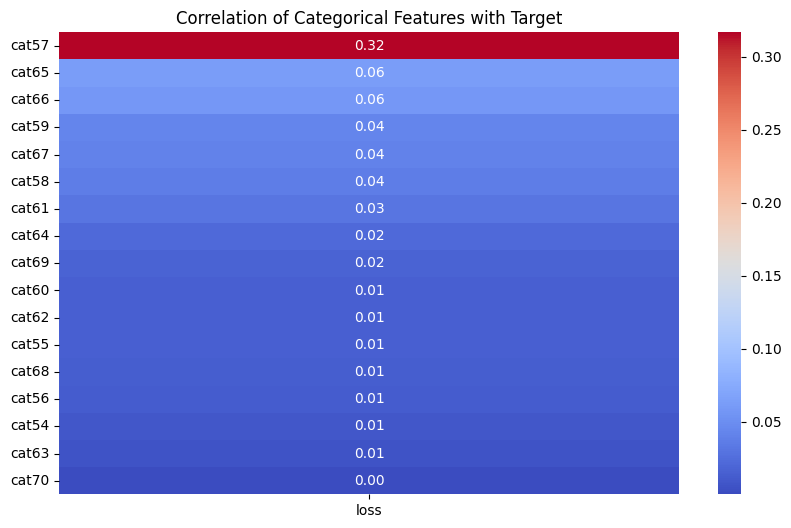

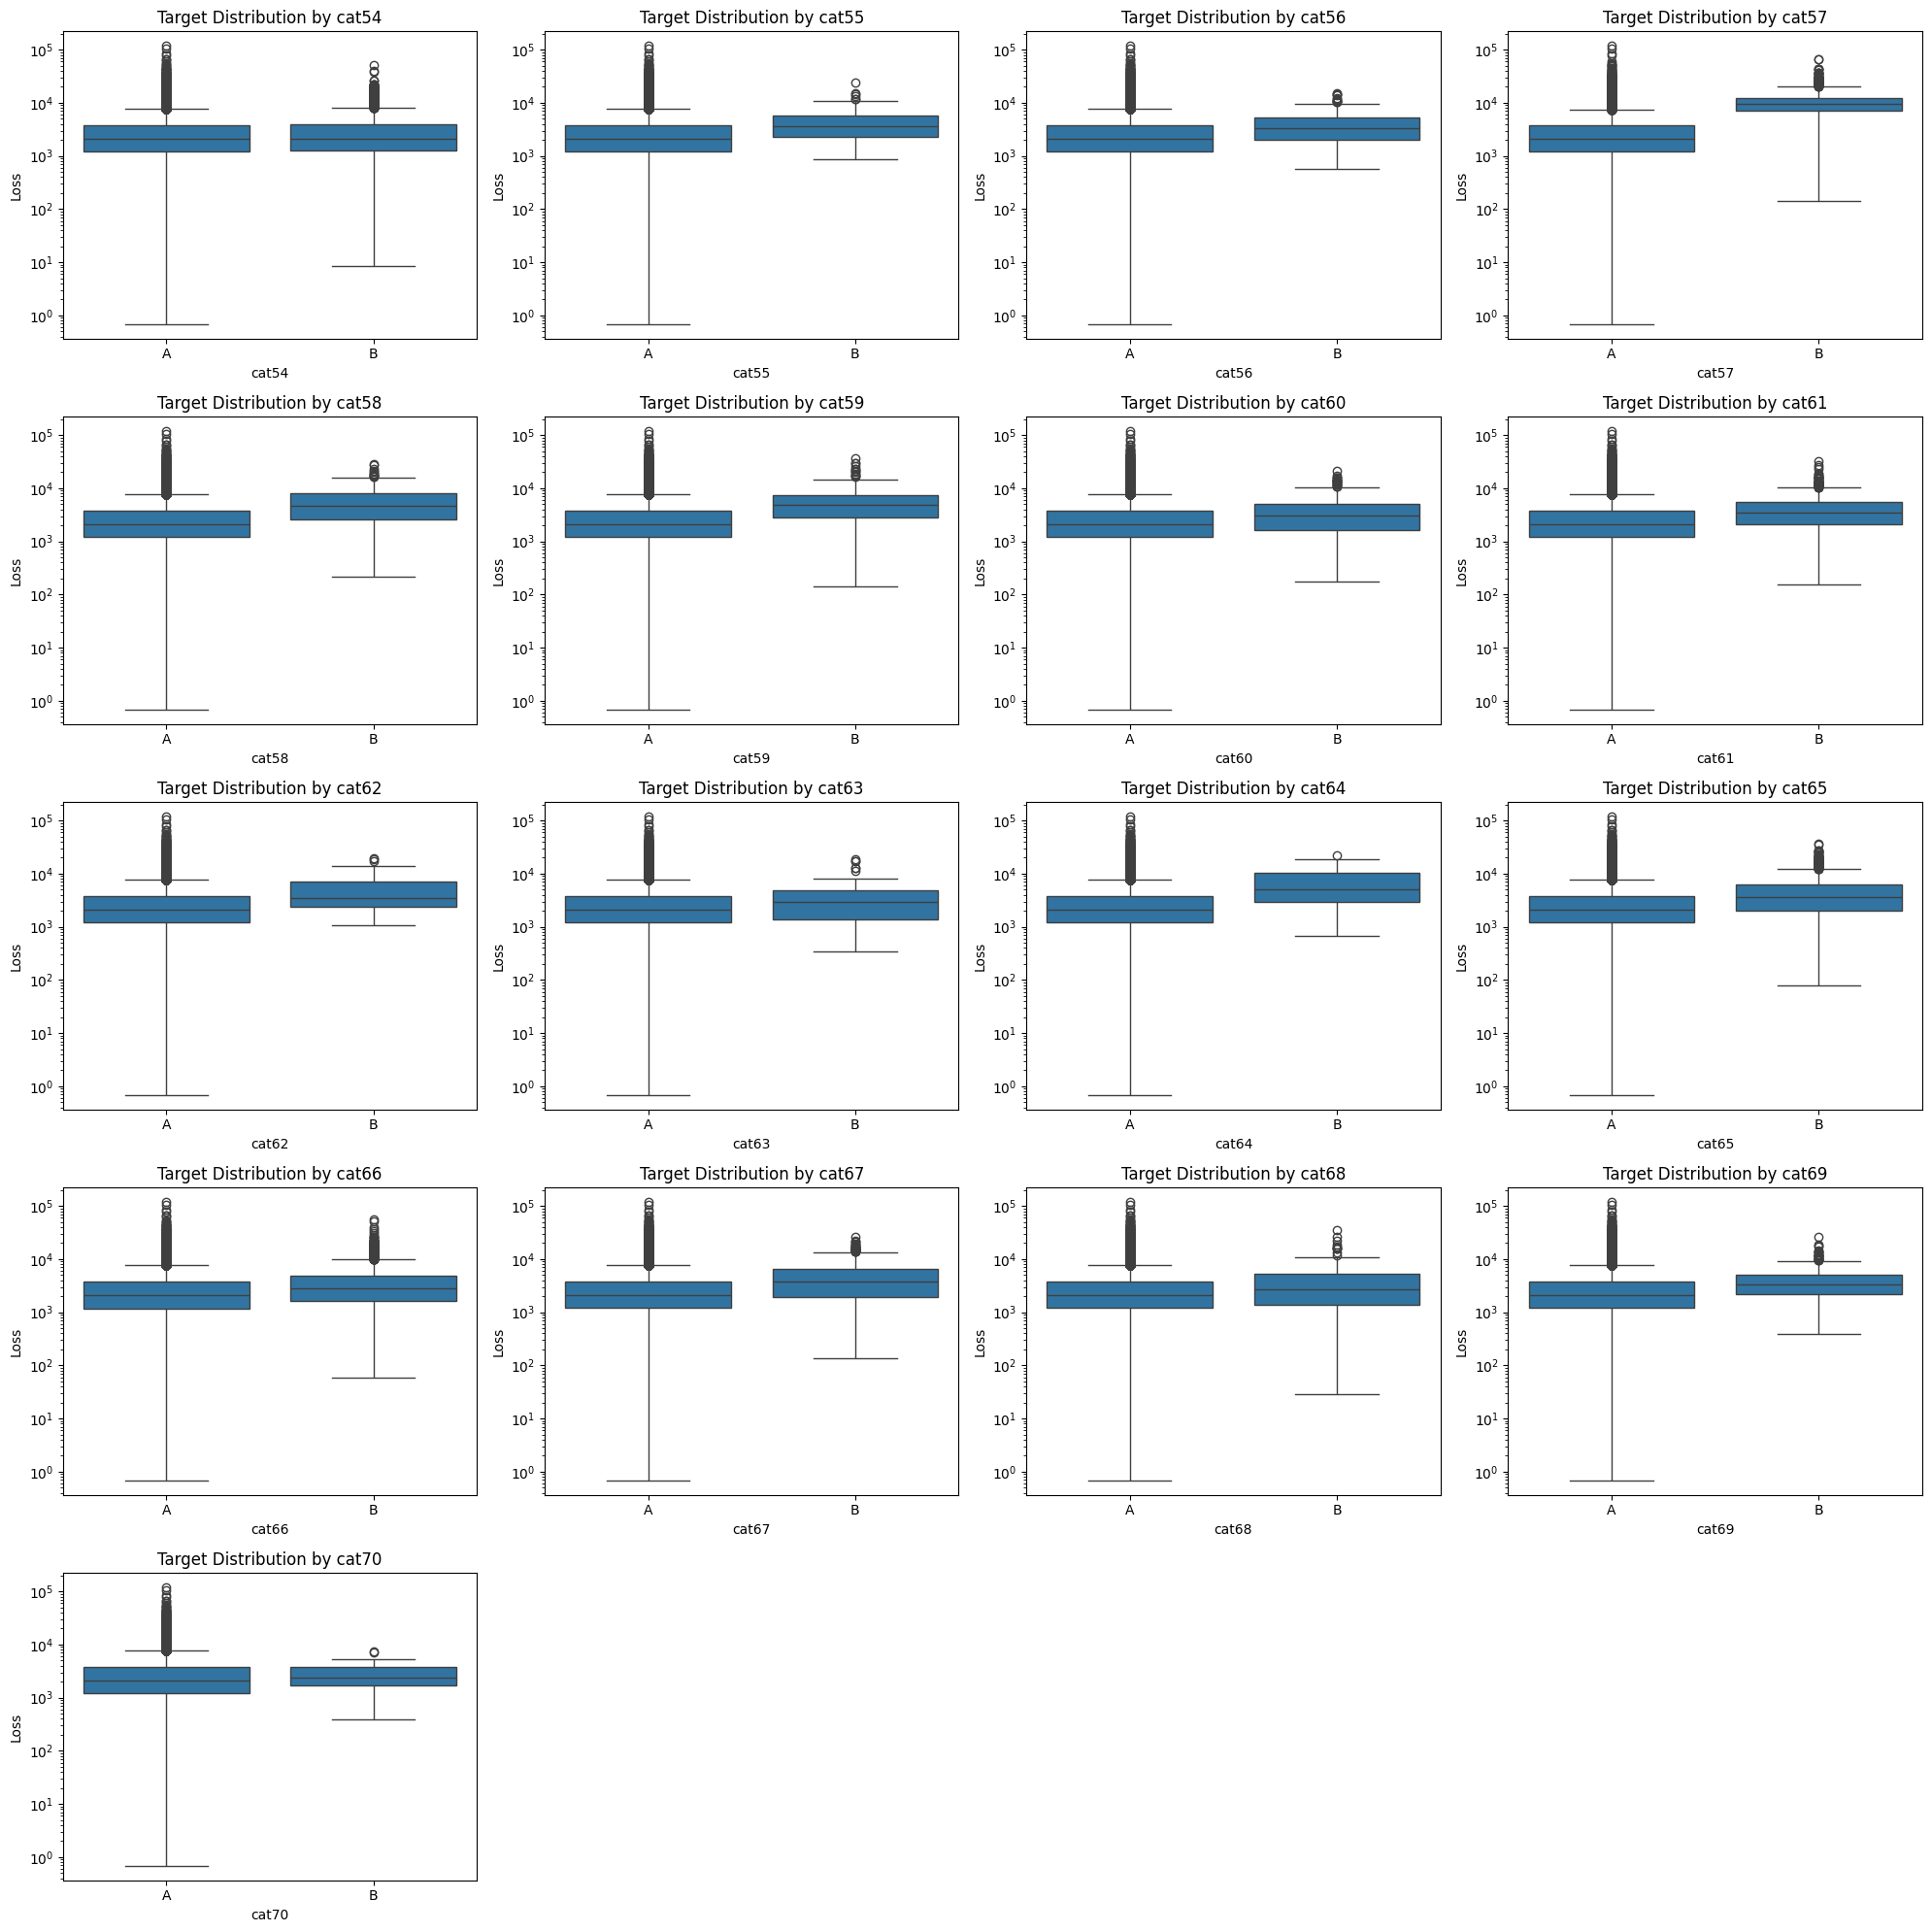

In [28]:
# Fit TargetEncoder
te = TargetEncoder(cols=cat_cols)
df_encoded = te.fit_transform(df[cat_cols], df[target_col])

# Add target column for correlation
df_encoded[target_col] = df[target_col]

# Compute correlation with target
corr_with_target = df_encoded.corr()[target_col].drop(target_col)
corr_with_target = corr_with_target.sort_values(ascending=False)

# Ranked predictive categorical features
features = corr_with_target.index[:]
print(f"Ranked predictive categorical features:\n")
for i, col in enumerate(features, 1):
    print(f"{i}. {col} (Correlation: {corr_with_target[col]:.4f})")

# Heatmap for all categorical correlations
plt.figure(figsize=(10,6))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Categorical Features with Target")
plt.show()

# Boxplots for selected categorical features
ncols = 4
nrows = (len(cat_cols) + ncols - 1) // ncols

plt.figure(figsize=(20, 20))

for idx, col in enumerate(cat_cols, 1):
    plt.subplot(nrows, ncols, idx)
    sns.boxplot(x=col, y='loss', data=df)
    plt.title(f"Target Distribution by {col}")
    plt.xlabel(col)
    plt.yscale('log')
    plt.ylabel("Loss")

plt.tight_layout()
plt.show()


Feature correlation analysis for categorical variables (cat54 - cat70) shows that cat57 is the most predictive feature with a correlation of 0.32 to the target loss, indicating a strong relationship. Secondary contributors such as cat65 (0.06) and cat66 (0.058) provide moderate predictive value, while others like cat59, cat67, and cat58 show weaker but potentially useful signal when combined with other variables. The remaining categories have minimal correlation and may add limited value to the model. Overall, these results suggest that focusing on cat57 and a few moderately correlated features could improve model performance while simplifying the dataset.